<a href="https://colab.research.google.com/github/xxxnmxhj00/Deep-Learning/blob/main/4_4%20%5B%ED%95%B4%EB%B3%B4%EA%B8%B0%5D%EB%B9%99%EC%82%B0%EC%9D%B8%EA%B0%80_%EC%84%A0%EB%B0%95%EC%9D%B8%EA%B0%80%3F_(%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 기본 라이브러리 불러오기 및 전처리
[Step 1] 데이터 준비/ 기본 설정



In [ ]:
### 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


[Step 2] 데이터 탐색/ 전처리

In [ ]:
# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)

# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
rdf['embarked'].fillna(most_freq, inplace=True)

[Step 3] 분석에 사용할 속성을 선택

In [ ]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    714 non-null    int64   
 1   pclass      714 non-null    int64   
 2   sex         714 non-null    object  
 3   age         714 non-null    float64 
 4   sibsp       714 non-null    int64   
 5   parch       714 non-null    int64   
 6   fare        714 non-null    float64 
 7   embarked    714 non-null    object  
 8   class       714 non-null    category
 9   who         714 non-null    object  
 10  adult_male  714 non-null    bool    
 11  alive       714 non-null    object  
 12  alone       714 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 63.6+ KB


In [ ]:
# 분석에 활용할 열(속성)을 선택
# ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
ndf.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [ ]:
# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환

# ndf['sex'] 원핫인코딩(판다스모듈이용)
onehot_sex = pd.get_dummies(ndf['sex']).astype('int')

# onehot_sex + ndf 붙이기
ndf = pd.concat([ndf, onehot_sex], axis=1)

# ndf['embarked'] 원핫인코딩
onehot_embarked = pd.get_dummies(ndf['embarked']).astype('int')
# onehot_embarked + ndf 붙이기
ndf = pd.concat([ndf, onehot_embarked], axis=1)

# ['sex', 'embarked'] 열 삭제
ndf.drop(['sex', 'embarked'], axis=1, inplace=True)

In [ ]:
ndf.head()

,survived,pclass,age,sibsp,parch,female,male,C,Q,S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


In [ ]:
# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female',
       'C', 'Q', 'S']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)

In [ ]:
X.shape

(714, 8)

In [ ]:
# 훈련 데이터셋과 테스트 데이터셋으로 나눕니다.
from sklearn.model_selection import train_test_split

# train, test 분류 8:2
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)

In [ ]:
print(f'훈련데이터 {x_train.shape}, 테스트데이터 {x_test.shape}')

훈련데이터 (571, 8), 테스트데이터 (143, 8)


In [ ]:
# train, validation 분류 7:3
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.3)

print(f'훈련데이터 {x_train.shape}, 테스트데이터 {x_test.shape}, \
검증데이터 {x_val.shape}')

훈련데이터 (399, 8), 테스트데이터 (143, 8), 검증데이터 (172, 8)


### 모델 구성하기
- 모델의 마지막 Dense 층에서 이진분류를 위한 활성화 함수 지정
  - 인자를 설정하지 않은 경우, default는 ‘linear’로 설정   
  - 이진분류일 경우에는 sigmoid를 사용
- 손실 함수는 이진분류 문제에서 주로 사용되는 binary_crossentropy를 사용


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 입력 데이터의 형태를 꼭 명시해야 합니다.
# 8차원의 데이터를 입력으로 받고, 32개의 출력을 가지는 첫 번째 Dense 층
# 층 만들기
model.add(Dense(64, activation = 'relu', input_shape = (x_train.shape[1], )))
model.add(Dense(32, activation = 'relu')) # 32개의 출력을 가지는 Dense 층
model.add(Dense(1, activation = 'sigmoid')) # 하나의 값을 출력합니다.

# 컴파일 설정
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
              metrics = ['acc'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 300, validation_data = (x_val, y_val))

Epoch 1/300
13/13 [==============================] - 1s 22ms/step - loss: 0.6393 - acc: 0.6266 - val_loss: 0.5934 - val_acc: 0.7151
Epoch 2/300
13/13 [==============================] - 0s 6ms/step - loss: 0.5663 - acc: 0.7519 - val_loss: 0.5342 - val_acc: 0.8314
Epoch 3/300
13/13 [==============================] - 0s 7ms/step - loss: 0.5105 - acc: 0.7995 - val_loss: 0.4933 - val_acc: 0.8198
Epoch 4/300
13/13 [==============================] - 0s 9ms/step - loss: 0.4695 - acc: 0.8145 - val_loss: 0.4683 - val_acc: 0.8081
Epoch 5/300
13/13 [==============================] - 0s 8ms/step - loss: 0.4403 - acc: 0.8195 - val_loss: 0.4498 - val_acc: 0.8081
Epoch 6/300
13/13 [==============================] - 0s 8ms/step - loss: 0.4205 - acc: 0.8296 - val_loss: 0.4376 - val_acc: 0.8023
Epoch 7/300
13/13 [==============================] - 0s 8ms/step - loss: 0.4059 - acc: 0.8246 - val_loss: 0.4307 - val_acc: 0.7907
Epoch 8/300
13/13 [==============================] - 0s 8ms/step - loss: 0.3960 - 

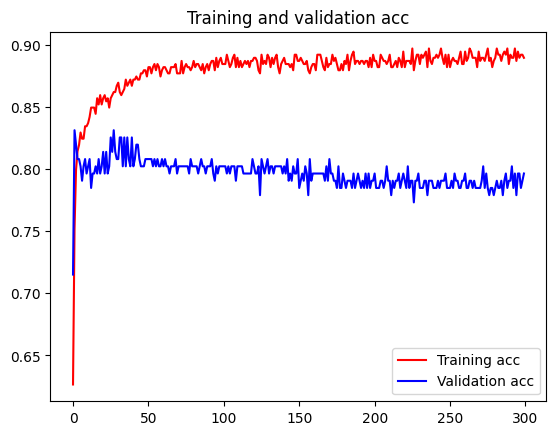

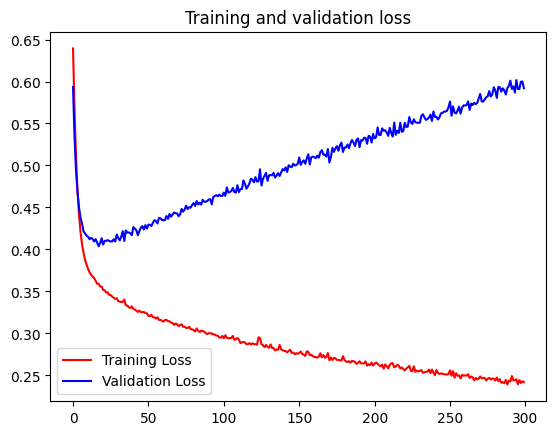

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 5ms/step - loss: 0.7736 - acc: 0.7483


[0.7735826373100281, 0.748251736164093]

In [ ]:
# test data를 가지고 y_hat을 예측 (분류)
y_hat = model.predict(x_test)

5/5 [==============================] - 0s 2ms/step


In [ ]:
y_hat[0]

array([0.01152623], dtype=float32)

In [ ]:
# threshold를 ( )
threshold = 0.5
y_hat[0] >= threshold

array([False])

In [ ]:
y_test = y_test.values
y_test[0]

0

In [ ]:
threshold = 0.5
result=[]
for i in y_hat:
  if i >= threshold:
    result.append(1)
  else:
    result.append(0)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        75
           1       0.76      0.69      0.72        68

    accuracy                           0.75       143
   macro avg       0.75      0.75      0.75       143
weighted avg       0.75      0.75      0.75       143



In [ ]:
print(confusion_matrix(y_test,result))

[[60 15]
 [21 47]]
